# Tugas Kecil AI 1

Complete documentation of classes : http://scikit-learn.org/stable/modules/classes.html

#### Inisialisasi Library

In [1]:
## Library Import and Initializations
# Datasets Library
import pandas as pd
import graphviz
from sklearn.datasets import load_iris

# Algorithm Library
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

## Skema Full-Training

In [2]:
# Read iris & play_tennis dataset
iris_data = load_iris()
tennis_data = pd.read_csv('dataset/tennis.csv')

In [24]:
# Naive Bayes
gnb = GaussianNB()
gnb = gnb.fit(iris_data.data, iris_data.target).predict(iris_data.data)
gnb

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

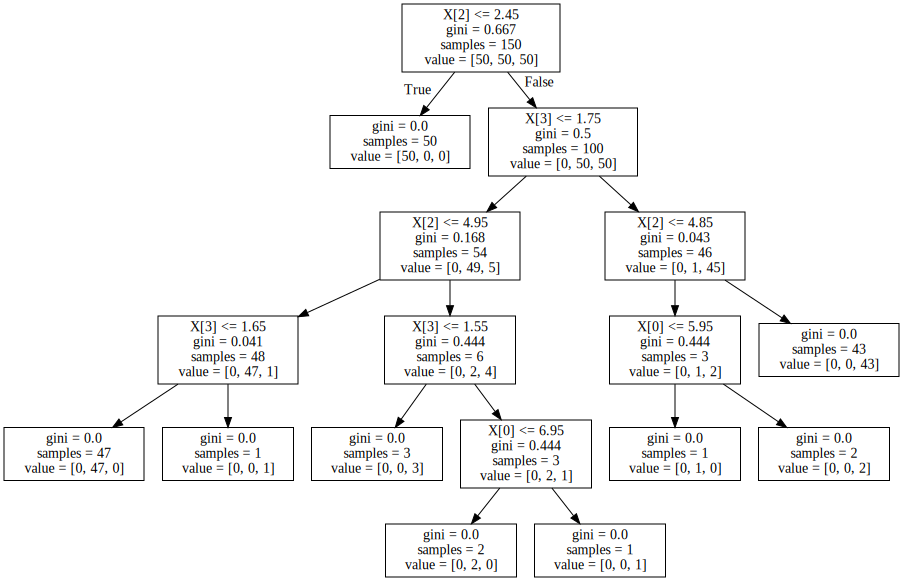

In [4]:
# Decision Tree
dt = tree.DecisionTreeClassifier()
dt = dt.fit(iris_data.data, iris_data.target)

tree_data = tree.export_graphviz(dt, out_file=None) 
graph = graphviz.Source(tree_data) 
graph

In [5]:
# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn = knn.fit(iris_data["data"], iris_data["target"])

knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [25]:
# MLP
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
mlp.fit(iris_data["data"], iris_data["target"])

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

## Skema Split Train 90-10

#### Split Data

In [7]:
x_train, x_test, y_train, y_test = train_test_split(iris_data["data"], iris_data["target"], test_size=0.1)

## Decision Tree

In [8]:
dt = tree.DecisionTreeClassifier()
dt.fit(x_train, y_train)

tree_data = tree.export_graphviz(dt, out_file=None) 
graph = graphviz.Source(tree_data)

In [9]:
dt_result = dt.predict(x_test)
dt_conf_matr = confusion_matrix(dt_result, y_test)
dt_conf_matr

array([[6, 0, 0],
       [0, 6, 0],
       [0, 1, 2]])

In [10]:
dt_score = dt.score(x_test, y_test)
dt_score

0.93333333333333335

## Naive Bayes

In [11]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB(priors=None)

In [12]:
dt_result = dt.predict(x_test)
gnb_conf_matr = confusion_matrix(dt_result, y_test)
dt_conf_matr

array([[6, 0, 0],
       [0, 6, 0],
       [0, 1, 2]])

In [13]:
gnb_score = gnb.score(x_test, y_test)
gnb_score

1.0

## KNN

In [14]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [15]:
knn_result = knn.predict(x_test)
knn_conf_matr = confusion_matrix(knn_result, y_test)
knn_conf_matr

array([[6, 0, 0],
       [0, 7, 0],
       [0, 0, 2]])

In [16]:
knn_score = knn.score(x_test, y_test)
knn_score

1.0

## MLP

In [17]:
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
mlp.fit(x_train, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [18]:
mlp_result = mlp.predict(x_test)
mlp_conf_matr = confusion_matrix(knn_result, y_test)
mlp_conf_matr

array([[6, 0, 0],
       [0, 7, 0],
       [0, 0, 2]])

In [19]:
mlp_score = mlp.score(x_test, y_test)
mlp_score

0.13333333333333333

In [20]:
gnb = GaussianNB()
cross_val_score(gnb, iris_data["data"], iris_data["target"], cv=10)

array([ 0.93333333,  0.93333333,  1.        ,  0.93333333,  0.93333333,
        0.93333333,  0.86666667,  1.        ,  1.        ,  1.        ])

In [21]:
knn = KNeighborsClassifier(n_neighbors=5)
cross_val_score(knn, iris_data["data"], iris_data["target"], cv=10)

array([ 1.        ,  0.93333333,  1.        ,  1.        ,  0.86666667,
        0.93333333,  0.93333333,  1.        ,  1.        ,  1.        ])

In [22]:
dt = tree.DecisionTreeClassifier()
cross_val_score(dt, iris_data["data"], iris_data["target"], cv=10)

array([ 1.        ,  0.93333333,  1.        ,  0.93333333,  0.93333333,
        0.86666667,  0.93333333,  1.        ,  1.        ,  1.        ])

In [23]:
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
cross_val_score(dt, iris_data["data"], iris_data["target"], cv=10)

array([ 1.        ,  0.93333333,  1.        ,  0.93333333,  0.93333333,
        0.86666667,  0.93333333,  0.93333333,  1.        ,  1.        ])